In [1]:
from IPython.display import clear_output
!pip3 install -U lazypredict

clear_output()

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

from lightgbm import LGBMClassifier
import lazypredict
from lazypredict.Supervised import LazyClassifier

import time
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/kaggle/input/water-quality-and-potability/water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.00,3276.00,3276.00,3276.00,2495.00,3276.00,3276.00,3114.00,3276.00,3276.00
mean,7.08,196.37,22014.09,7.12,333.78,426.21,14.28,66.40,3.97,0.39
std,1.59,32.88,8768.57,1.58,41.42,80.82,3.31,16.18,0.78,0.49
min,0.00,47.43,320.94,0.35,129.00,181.48,2.20,0.74,1.45,0.00
25%,6.09,176.85,15666.69,6.13,307.70,365.73,12.07,55.84,3.44,0.00
50%,7.04,196.97,20927.83,7.13,333.07,421.88,14.22,66.62,3.96,0.00
75%,8.06,216.67,27332.76,8.11,359.95,481.79,16.56,77.34,4.50,1.00
max,14.00,323.12,61227.20,13.13,481.03,753.34,28.30,124.00,6.74,1.00


In [5]:
#NULL qiymatlarni sonini aniqlab olamiz
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
#NULL qiymatlarni to'ldrib chiqamiz
df['ph'].fillna(df['ph'].mean(), axis=0, inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), axis=0, inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), axis=0, inplace=True)

In [7]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

df

In [8]:
df.duplicated().sum()

0

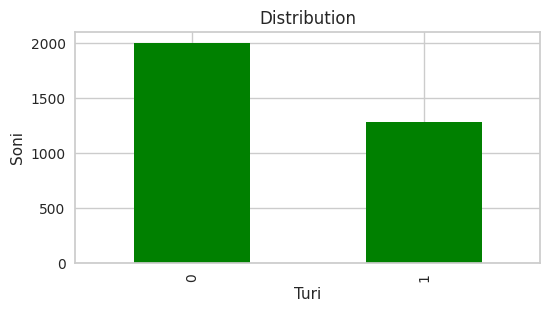

In [9]:
value_counts = df['Potability'].value_counts()

plt.figure(figsize=(6, 3))
value_counts.plot(kind='bar', color='green')
plt.title("Distribution")
plt.xlabel("Turi")
plt.ylabel("Soni")
plt.show()

In [10]:
#Machine Learning

scaler = StandardScaler()

X = df.drop(columns='Potability')
y = df['Potability']

scaled_data = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2620, 9)
(656, 9)
(2620,)
(656,)


In [11]:
clf = LazyClassifier( verbose=0,
                      ignore_warnings=True,
                        custom_metric=None,
                        predictions=False,
                        random_state=45,
                        classifiers='all'
                            )
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:07<00:00,  3.83it/s]


In [12]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.67,0.63,0.63,0.65,0.62
XGBClassifier,0.66,0.62,0.62,0.65,0.66
NuSVC,0.64,0.60,0.60,0.63,0.53
SVC,0.67,0.60,0.60,0.62,0.35
QuadraticDiscriminantAnalysis,0.66,0.60,0.60,0.62,0.05
ExtraTreeClassifier,0.61,0.59,0.59,0.61,0.02
ExtraTreesClassifier,0.65,0.59,0.59,0.61,0.55
RandomForestClassifier,0.65,0.58,0.58,0.61,1.18
BaggingClassifier,0.63,0.58,0.58,0.61,0.28


In [13]:
line = px.line(data_frame=models, y = ['Accuracy'], markers = True)
line.update_xaxes(title = "Model", rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="green")
line.update_layout(showlegend=True, 
                   title = {
                       'text': 'Accuracy vs Model',
                       'y': 0.94,
                       'x': 0.5,
                       'xanchor': 'center',
                       'yanchor': 'top'
                   })
line.show()

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

param_grid = {}

qda = QuadraticDiscriminantAnalysis()

stratifiled_kfold = StratifiedKFold(n_splits=11, shuffle=True, random_state=45)

grid_search = GridSearchCV(qda, cv=stratifiled_kfold, param_grid = param_grid, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Accuracy  :", test_accuracy)

Best Parameters: {}
Test Accuracy  : 0.6585365853658537


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       396
           1       0.65      0.30      0.41       260

    accuracy                           0.66       656
   macro avg       0.66      0.60      0.59       656
weighted avg       0.66      0.66      0.62       656



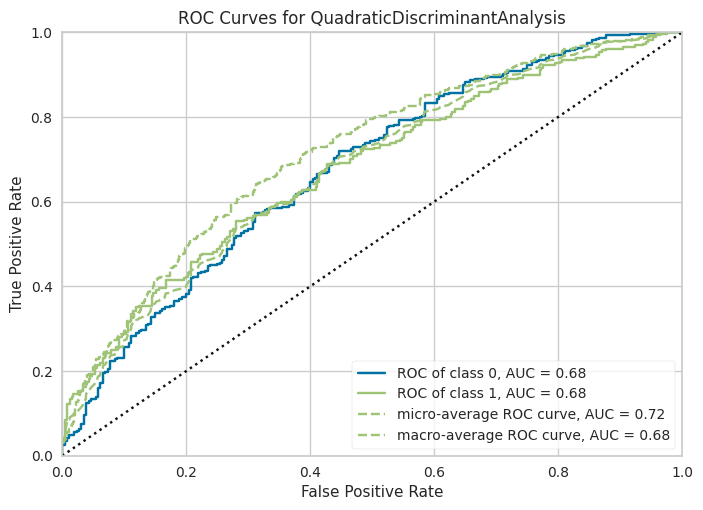

<Axes: title={'center': 'ROC Curves for QuadraticDiscriminantAnalysis'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [16]:
ROC = ROCAUC(qda)
ROC.fit(X_train, y_train)
ROC.score(X_test, y_test)
ROC.poof()